In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls 'drive/'

MyDrive


In [ ]:
!ls 

drive  sample_data


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
dataset=r'drive/MyDrive/PROJECT/Mask_Dataset'
imagePaths=list(paths.list_images(dataset))

In [5]:
imagePaths

['drive/MyDrive/PROJECT/Mask_Dataset/with_mask/augmented_image_104.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/9-with-mask.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/291-with-mask.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/pra3.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/augmented_image_131.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/473-with-mask.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/prajna.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/augmented_image_19.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/augmented_image_262.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/358-with-mask.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/443-with-mask.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/133-with-mask.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/augmented_image_199.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/234-with-mask.jpg',
 'drive/MyDrive/PROJECT/Mask_Dataset/with_mask/154-

dividing the dataset into two part i.e.  data  means images & labels means 'with mask' or 'without mask'

In [6]:
data=[]
labels=[]

for i in imagePaths:
  label=i.split(os.path.sep)[-2]
  labels.append(label)
  image=load_img(i,target_size=(224,224))
  image=img_to_array(image)
  image=preprocess_input(image)
  data.append(image)

In [7]:
data

[array([[[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        ...,
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
  

In [8]:
labels

['with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

converting these data arrays into numpy arrays for computation

In [9]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [10]:
data.shape

(1376, 224, 224, 3)

In [11]:
labels

array(['with_mask', 'with_mask', 'with_mask', ..., 'without_mask',
       'without_mask', 'without_mask'], dtype='<U12')

perform one-hot encoding on the labels
converting labels to binary format

In [12]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [13]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

splitting data into training and testing

In [14]:
train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [15]:
train_X.shape

(1100, 224, 224, 3)

In [16]:
train_Y.shape

(1100, 2)

In [17]:
test_X.shape

(276, 224, 224, 3)

In [18]:
test_Y.shape

(276, 2)

construct the training image generator for data augmentation

In [19]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode='nearest')

load the MobileNetV2 network, ensuring the head FC layer sets are left off

In [20]:
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

9420800/9406464 [==============================] - 0s 0us/step


In [21]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

construct the head of the model that will be placed on top of the the base model

In [22]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

place the head FC model on top of the base model (this will become the actual model we will train)

In [23]:
model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

loop over all layers in the base model and freeze them so they will *not* be updated during the first training process

In [24]:
for layer in baseModel.layers:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

initialize the initial learning rate, number of epochs to train for, and batch size

In [25]:
learning_rates = 1e-4
EPOCHS = 20
BS = 32

compile our model

In [26]:
print("[INFO] compiling model...")
opt = Adam(lr=learning_rates, decay=learning_rates / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


train the head of the network

In [27]:
print("[INFO] training head...")
H = model.fit(
	aug.flow(train_X, train_Y, batch_size=BS),
	steps_per_epoch=len(train_X) // BS,
	validation_data=(test_X, test_Y),
	validation_steps=len(test_X) // BS,
	epochs=EPOCHS
  )

model.save(r'D:\Pankaj\PROJECT\mask detection\maskdetection_model')

[INFO] training head...
Epoch 1/20
34/34 [==============================] - 35s 631ms/step - loss: 0.5577 - accuracy: 0.7556 - val_loss: 0.2347 - val_accuracy: 0.9783
Epoch 2/20
34/34 [==============================] - 17s 492ms/step - loss: 0.2165 - accuracy: 0.9672 - val_loss: 0.0976 - val_accuracy: 0.9928
Epoch 3/20
34/34 [==============================] - 16s 480ms/step - loss: 0.1297 - accuracy: 0.9747 - val_loss: 0.0553 - val_accuracy: 0.9928
Epoch 4/20
34/34 [==============================] - 15s 433ms/step - loss: 0.0831 - accuracy: 0.9860 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 5/20
34/34 [==============================] - 18s 521ms/step - loss: 0.0565 - accuracy: 0.9925 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 6/20
34/34 [==============================] - 18s 516ms/step - loss: 0.0477 - accuracy: 0.9906 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 7/20
34/34 [==============================] - 16s 470ms/step - loss: 0.0467 - accuracy: 0.9888 - val_loss: 0.017

In [29]:
model.save(r'D:\Pankaj\PROJECT\mask detection\maskdetection_model')

INFO:tensorflow:Assets written to: D:\Pankaj\PROJECT\mask detection\maskdetection_model/assets


In [28]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       138
without_mask       1.00      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



plot the training loss and accuracy

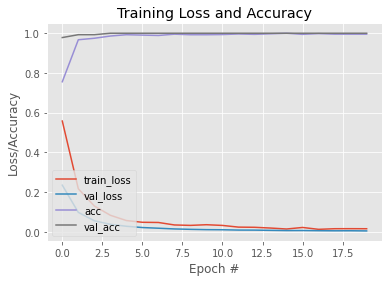

In [31]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'D:\Pankaj\PROJECT\mask detection\plot_v2.png')

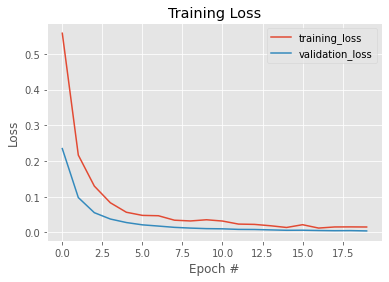

In [38]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="training_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="validation_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.savefig(r'drive/MyDrive/PROJECT/loss_plot_v2.png')

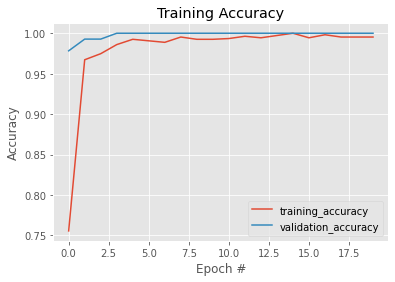

In [37]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="training_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="validation_accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.savefig(r'drive/MyDrive/PROJECT/accuracy_plot_v2.png')